In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (12, 12)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Anthony_version_project/satisfaction_usethisone_.csv')

# Check the data type and quality

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [ ]:
df.isnull().any()

id                                   False
satisfaction_v2                      False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Seat comfort                         False
Departure/Arrival time convenient    False
Food and drink                       False
Gate location                        False
Inflight wifi service                False
Inflight entertainment               False
Online support                       False
Ease of Online booking               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Online boarding                      False
Departure Delay in Minutes           False
Arrival Del

# One Hot encoding

In [ ]:
df["one_hot_Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)

In [ ]:
df["one_hot_Customer Type"] = df["Customer Type"].apply(lambda x: 1 if x == "Loyal Customer" else 0)

In [ ]:
df["one_hot_Type of Travel"] = df["Type of Travel"].apply(lambda x: 1 if x == "Personal Travel" else 0)

In [ ]:
df["one_hot_Class_E"] = df["Class"].apply(lambda x: 1 if x == "Eco" else 0)
df["one_hot_Class_EP"] = df["Class"].apply(lambda x: 1 if x == "Eco Plus" else 0)
df["one_hot_Class_B"] = df["Class"].apply(lambda x: 1 if x == "Business" else 0)

#Fill null data

In [ ]:
#testing the fill null method

#df.fillna(method='pad',inplace = True)
# [[10780  4058]
# [ 4076 13556]]

#df.fillna(method='ffill',inplace = True)
#[[10683  4048]
#[ 4067 13672]]

#df.fillna(method='bfill',inplace = True)
#[[10786  3992]
#[ 4055 13637]]

#df.fillna(value=df['Arrival Delay in Minutes'].mean(),inplace = True)
#[[10701  4006]
#[ 4107 13656]]

#df.fillna(value=0,inplace = True)
#[[10618  4081]
#[ 4083 13688]]

Fill missing data by mean has the best performance

In [ ]:
df.fillna(value=df['Arrival Delay in Minutes'].mean(),inplace = True)

In [ ]:
df.isnull().any()

id                                   False
satisfaction_v2                      False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Seat comfort                         False
Departure/Arrival time convenient    False
Food and drink                       False
Gate location                        False
Inflight wifi service                False
Inflight entertainment               False
Online support                       False
Ease of Online booking               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Cleanliness                          False
Online boarding                      False
Departure Delay in Minutes           False
Arrival Del

In [ ]:
X=df.iloc[:,[24,25,26,27,28,29,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].values
y=df.satisfaction_v2.values

#Split the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Standardize data

In [ ]:
# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#If you will not do the resampling run this


In [ ]:
X_train_sen, y_train_sen = X_train , y_train

#Smote


In [ ]:
from imblearn.over_sampling import SMOTE
sm_ = SMOTE()
X_train_sen, y_train_sen = sm_.fit_resample(X_train, y_train)

# Smoteenn

In [ ]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN() 
X_train_sen, y_train_sen = sm.fit_resample(X_train, y_train)

# KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_sen, y_train_sen)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result_knn = accuracy_score(y_test, y_pred)
print('Accuracy is: ', result_knn*100)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy is:  91.74006775485063
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.95      0.91     14779
              satisfied       0.95      0.89      0.92     17691

               accuracy                           0.92     32470
              macro avg       0.92      0.92      0.92     32470
           weighted avg       0.92      0.92      0.92     32470

[[13987   792]
 [ 1890 15801]]


#Decision tree clasifier

In [ ]:
#Call the DT Classifier
from sklearn.tree import DecisionTreeClassifier
#Initiating the classifier
model_dt = DecisionTreeClassifier(criterion='entropy')
#Passing the data to the classifier
model_dt.fit(X_train_sen, y_train_sen)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_dt = model_dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result_DT = accuracy_score(y_test, y_pred_dt)
print('Accuracy is: ', result_DT*100)
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

Accuracy is:  92.96273483215276
                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.94      0.92     14779
              satisfied       0.95      0.92      0.93     17691

               accuracy                           0.93     32470
              macro avg       0.93      0.93      0.93     32470
           weighted avg       0.93      0.93      0.93     32470

[[13869   910]
 [ 1375 16316]]


#Random forest classifier

In [ ]:
#Call the RF Classifier
from sklearn.ensemble import RandomForestClassifier
#Initiating the classifier
model_rf = RandomForestClassifier(n_estimators=200)
#Passing the data to the classifier
model_rf.fit(X_train_sen, y_train_sen)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred_rf = model_rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy is: ', result_rf*100)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Accuracy is:  95.1647674776717
                         precision    recall  f1-score   support

neutral or dissatisfied       0.92      0.97      0.95     14779
              satisfied       0.98      0.93      0.95     17691

               accuracy                           0.95     32470
              macro avg       0.95      0.95      0.95     32470
           weighted avg       0.95      0.95      0.95     32470

[[14396   383]
 [ 1187 16504]]


In [ ]:
model_rf.feature_importances_

array([0.0302355 , 0.04151458, 0.02419419, 0.01378427, 0.00240567,
       0.02941301, 0.03828295, 0.12696529, 0.02511399, 0.04023946,
       0.02177538, 0.01647061, 0.20729796, 0.06637734, 0.07815006,
       0.0457916 , 0.04338987, 0.02980979, 0.02617698, 0.02616368,
       0.03404652, 0.01564533, 0.01675599])

In [ ]:
print(df.columns)

Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'one_hot_Gender', 'one_hot_Customer Type', 'one_hot_Type of Travel',
       'one_hot_Class_E', 'one_hot_Class_EP', 'one_hot_Class_B'],
      dtype='object')


<BarContainer object of 23 artists>

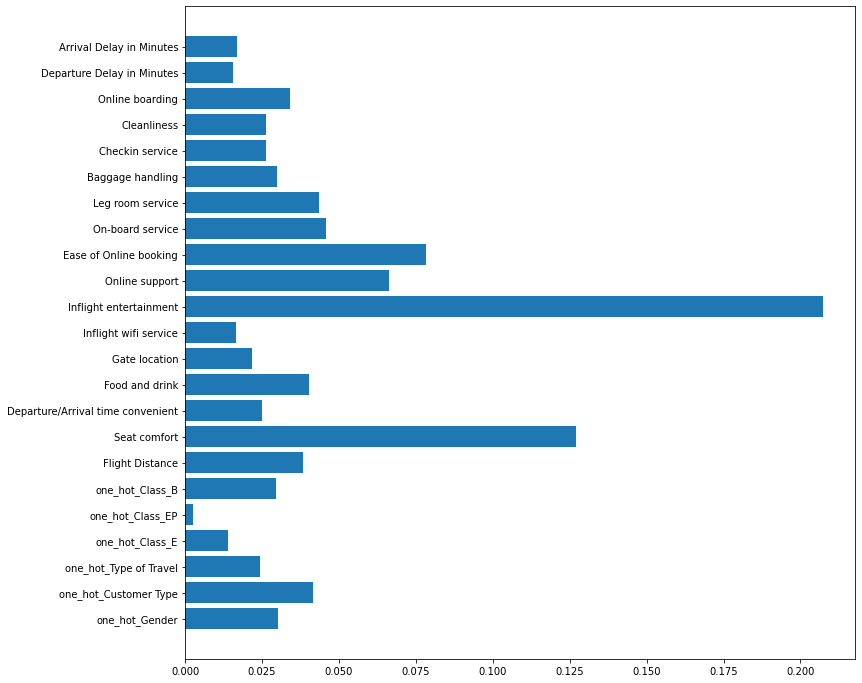

In [ ]:
plt.barh(df.iloc[:,[24,25,26,27,28,29,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].columns, model_rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

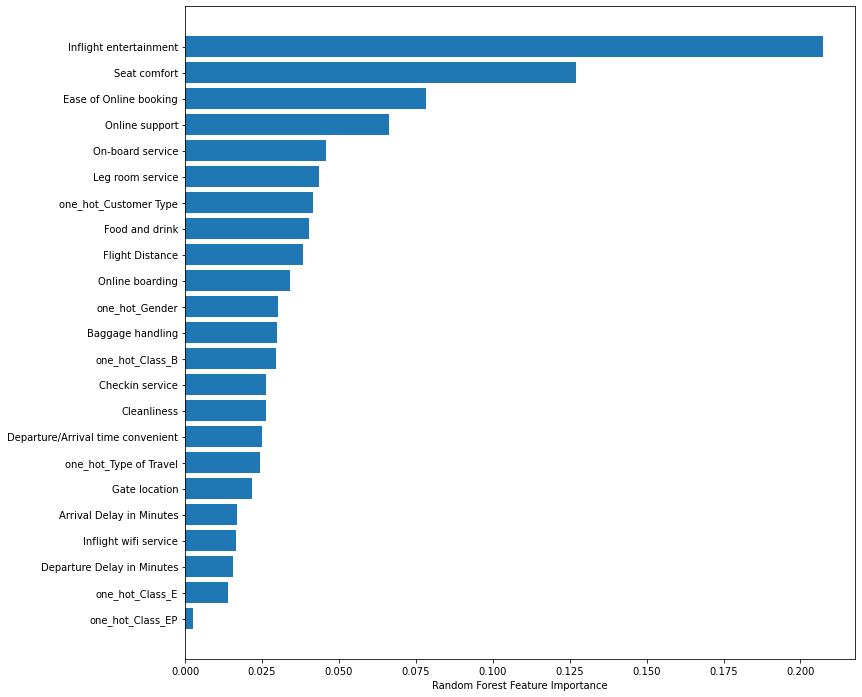

In [ ]:
sorted_idx = model_rf.feature_importances_.argsort()
plt.barh(df.iloc[:,[24,25,26,27,28,29,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]].columns[sorted_idx], model_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#Naive bayes classification

In [ ]:
#Call the NB Classifier
from sklearn.naive_bayes import GaussianNB
#Initiating the classifier
model_nb = GaussianNB()
#Passing the data to the classifier
model_nb.fit(X_train_sen, y_train_sen)

GaussianNB()

In [ ]:
y_pred_nb = model_nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy is: ', result_nb*100)
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

Accuracy is:  82.0757622420696
                         precision    recall  f1-score   support

neutral or dissatisfied       0.80      0.81      0.80     14779
              satisfied       0.84      0.83      0.83     17691

               accuracy                           0.82     32470
              macro avg       0.82      0.82      0.82     32470
           weighted avg       0.82      0.82      0.82     32470

[[11964  2815]
 [ 3005 14686]]


#Support vector classification

In [ ]:
#Call the SVC Classifier
from sklearn.svm import SVC
#Initiating the classifier
model_sv = SVC()
#Passing the data to the classifier
model_sv.fit(X_train_sen, y_train_sen)

SVC()

In [ ]:
y_pred_sv = model_sv.predict(X_test)

In [ ]:
#Classification Metrics - To check the final results
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result_sv = accuracy_score(y_test, y_pred_sv)
print('Accuracy is: ', result_sv*100)
print(classification_report(y_test, y_pred_sv))
print(confusion_matrix(y_test, y_pred_sv))

Accuracy is:  94.70588235294117
                         precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.95      0.94     14779
              satisfied       0.96      0.94      0.95     17691

               accuracy                           0.95     32470
              macro avg       0.95      0.95      0.95     32470
           weighted avg       0.95      0.95      0.95     32470

[[14055   724]
 [  995 16696]]


#Logistic Regression Classifier

In [ ]:
#Call the Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
#Initiating the classifier
model_lr = LogisticRegression(solver='liblinear',max_iter=200)
#Passing the data to the classifier
model_lr.fit(X_train_sen, y_train_sen)

LogisticRegression(max_iter=200, solver='liblinear')

In [ ]:
y_pred_lr = model_lr.predict(X_test)

In [ ]:
#Classification Metrics - To check the final results
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

result_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy is: ', result_lr*100)
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Accuracy is:  83.61564521096396
                         precision    recall  f1-score   support

neutral or dissatisfied       0.80      0.85      0.82     14779
              satisfied       0.87      0.83      0.85     17691

               accuracy                           0.84     32470
              macro avg       0.83      0.84      0.84     32470
           weighted avg       0.84      0.84      0.84     32470

[[12515  2264]
 [ 3056 14635]]


#Ensemble learning


In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

In [ ]:
#model = KNeighborsClassifier()
#model_dt = DecisionTreeClassifier(criterion='entropy')
#model_rf = RandomForestClassifier(n_estimators=200)
#model_nb = GaussianNB()
#model_sv = SVC()
#model_lr = LogisticRegression(solver='liblinear',max_iter=200)

#Modeling with cross validation

In [ ]:
max_features = 3
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy for KNeighborsClassifier:", round(results.mean()*100, 2))

Accuracy for KNeighborsClassifier: 71.97


In [ ]:
max_features = 3
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(model_dt, X, y, cv=kfold)
print("Accuracy for DecisionTreeClassifier:", round(results.mean()*100, 2))

Accuracy for DecisionTreeClassifier: 87.52


In [ ]:
max_features = 3
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(model_rf, X, y, cv=kfold)
print("Accuracy for Randomforestclassifier:", round(results.mean()*100, 2))

Accuracy for Randomforestclassifier: 89.97


In [ ]:
max_features = 3
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(model_nb, X, y, cv=kfold)
print("Accuracy for Naivebayesclassification:", round(results.mean()*100, 2))

Accuracy for Naivebayesclassification: 79.21


# Runtime of support vector classification with cross validation more than 1 hour

In [ ]:
from sklearn.svm import SVC
max_features = 3
kfold = model_selection.KFold(n_splits=10)
model_sv = SVC()
results = model_selection.cross_val_score(model_sv, X, y, cv=kfold)
print("Accuracy for Supportvectorclassification:", round(results.mean()*100, 2))

In [ ]:
max_features = 3
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(model_lr, X, y, cv=kfold)
print("Accuracy for LogisticRegressionclassification:", round(results.mean()*100, 2))

Accuracy for LogisticRegressionclassification: 79.05


#Bagging

In [ ]:
kfold = model_selection.KFold(n_splits=10)
#model_dt = DecisionTreeClassifier()
num_trees = 100
model_bdt = BaggingClassifier(base_estimator=model_dt, n_estimators=num_trees)
results = model_selection.cross_val_score(model_bdt, X, y, cv=kfold)
print("Accuracy for BaggingClassifier:", round(results.mean()*100, 2))

Accuracy for BaggingClassifier: 90.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

num_trees = 200
kfold = model_selection.KFold(n_splits=10)
model_erf = RandomForestClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model_erf, X, y, cv=kfold)
print("Accuracy for RandomForestClassifier:", round(results.mean()*100, 2))

Accuracy for RandomForestClassifier: 89.95


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model_et = ExtraTreesClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model_et, X, y, cv=kfold)
print("Accuracy for ExtraTreesClassifier:", round(results.mean()*100, 2))

Accuracy for ExtraTreesClassifier: 89.21


#Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model_adaB = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model_adaB, X, y, cv=kfold)
print("Accuracy for AdaBoostClassifier:", round(results.mean()*100, 2))

Accuracy for AdaBoostClassifier: 85.81


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model_gb = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model_gb, X, y, cv=kfold)
print("Accuracy for GradientBoostingClassifier:", round(results.mean()*100,2) )

Accuracy for GradientBoostingClassifier: 90.82


 # The runtime of voting classifier more than 4 hours

In [ ]:
from sklearn.ensemble import VotingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10)

estimators = []
estimators.append(('KNN', model))
estimators.append(('decision_tree', model_dt))
estimators.append(('random_forest', model_rf))
estimators.append(('naive_bayes', model_nb))
estimators.append(('support_vector', model_sv))
estimators.append(('logistic_regression', model_dt))

ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print("Accuracy for VotingClassifier:", round(results.mean()*100, 2))

In [ ]:
import xgboost as xgb

seed = 7
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model_xgb = xgb.XGBClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model_xgb, X, y, cv=kfold)
print("Accuracy for XGBoost:", round(results.mean()*100, 2)) 

Accuracy for XGBoost: 90.42


# PCA for finding the minimun amoung of features with more than 90% accuracy


In [ ]:
from sklearn.decomposition import PCA

n_com = []
for i in range(1,23):
  pca = PCA(n_components = i)
  X_train_pca = pca.fit_transform(X_train_sen)
  X_test_pca = pca.transform(X_test)
  model_rf.fit(X_train_pca, y_train_sen)
  y_pred = model_rf.predict(X_test_pca)
  n_com.append(accuracy_score(y_test, y_pred)*100)

In [ ]:
print(n_com)

[68.96827841084078, 76.98490914690484, 81.87249769017555, 85.64829072990453, 86.40899291653834, 89.125346473668, 90.58515552817987, 90.80381890976285, 90.92085001539883, 91.70311056359716, 91.96181090237143, 91.98336926393594, 91.90021558361565, 92.05420388050509, 92.12811826301201, 92.44225438866646, 92.63012011087157, 92.83338466276562, 92.99661225746844, 93.37234370187866, 93.4154604250077, 93.26147212811826]


In [ ]:
n_com_dropdown = [68.96827841084078, 76.98490914690484, 81.87249769017555, 85.64829072990453, 86.40899291653834, 89.125346473668, 90.58515552817987, 90.80381890976285, 90.92085001539883, 91.70311056359716, 91.96181090237143, 91.98336926393594, 91.90021558361565, 92.05420388050509, 92.12811826301201, 92.44225438866646, 92.63012011087157, 92.83338466276562, 92.99661225746844, 93.37234370187866, 93.4154604250077, 93.26147212811826]

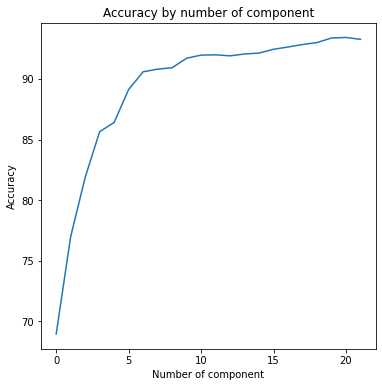

In [ ]:
plt.figure(figsize=(6,6)) 
plt.plot(n_com) 
plt.title('Accuracy by number of component')
plt.ylabel('Accuracy')
plt.xlabel('Number of component')

plt.show()

# LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components = 1)
X_train_lda = lda.fit_transform(X_train_sen,y_train_sen)
X_test_lda = lda.transform(X_test)
model_rf.fit(X_train_lda, y_train_sen)
y_pred = model_rf.predict(X_test_lda)

print(accuracy_score(y_test, y_pred)*100)
print(lda.explained_variance_ratio_)
print(lda.priors)
print(lda.means_)
print(lda.scalings_)
print(lda.xbar_)
print(lda.classes_)
print(lda.coef_)
print(lda.n_features_in_)

76.60609793655682
[1.]
None
[[ 0.2323442  -0.32580774  0.11929041  0.3020738   0.07357855 -0.33892257
   0.04265066 -0.26429397  0.01659157 -0.13230926  0.01445933 -0.24576674
  -0.57406702 -0.42663769 -0.47337561 -0.38872174 -0.34048357 -0.28646103
  -0.29629685 -0.28538338 -0.37086877  0.07566642  0.08056029]
 [-0.19108996  0.26864564 -0.09959492 -0.25237253 -0.06026544  0.28253102
  -0.03724804  0.21750122 -0.01557489  0.10727907 -0.01110559  0.20405456
   0.47418727  0.35296855  0.39122027  0.32028619  0.2779997   0.23775442
   0.24266729  0.2358112   0.30637031 -0.06632632 -0.07174836]]
[[-0.27684176]
 [ 0.45359573]
 [-0.21672125]
 [-0.07593038]
 [-0.05233555]
 [ 0.10862405]
 [-0.03964477]
 [ 0.2540905 ]
 [-0.19561074]
 [-0.20474795]
 [ 0.09715591]
 [-0.06180082]
 [ 0.57392069]
 [ 0.06941597]
 [ 0.18629119]
 [ 0.22119547]
 [ 0.16724241]
 [ 0.06829624]
 [ 0.20496592]
 [ 0.06055335]
 [ 0.12563079]
 [ 0.03098321]
 [-0.13006937]]
[ 0.02062712 -0.02858105  0.00984774  0.02485063  0.006

# Hyper parameter optimiazation (manual, grid search, randomized search)

# Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Criterion
criterion = ["gini","entropy"]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 25]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 12]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_sen, y_train_sen)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
102 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-pa

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=200),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4, 8, 12],
                                        'min_samples_split': [2, 5, 10, 15, 25],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [ ]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train_sen, y_train_sen)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Accuracy = 0.94%.


In [ ]:
best_random = rf_random.best_estimator_
print(best_random)
random_accuracy = evaluate(best_random, X_test, y_test)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=110,
                       n_estimators=600)
Model Performance
Accuracy = 0.95%.


In [ ]:
best_random

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=110,
                       n_estimators=600)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.90%.


#Create the list of accuracy


In [ ]:
model_list_notdealingwithimbalance = [round(result_knn*100,2), round(result_DT*100,2), round(result_rf*100,2), round(result_nb*100,2), round(result_sv*100,2), round(result_lr*100,2)]
print(model_list_notdealingwithimbalance)

[91.81, 88.39, 92.38, 81.84, 94.59, 83.56]


#Record the accuracy data
# KNN, decision tree, random forest, naive bayes, Support vector, Logistic Regression

In [ ]:
model_list_raw_data = [75.08, 93.93, 95.53, 81.57, 60.94, 83.35]
runtime_raw_data = [73.77, 3.93, 30.75, 3.224, 1431.55, 6.94]

In [ ]:
picture = pd.DataFrame(
    {
        "classifier": ["KNN", "decision tree", "random forest", "naive bayes", "Support vector", "Logistic Regression"],
        "accurary": [75.08, 93.93, 95.53, 81.57, 60.94, 83.35],
        "runtime_raw_data": [73.77, 3.93, 30.75, 3.224, 1431.55, 6.94]
    }
)
picture[['classifier', 'accurary']].plot(x='classifier', linestyle='-', marker='o', use_index=True)
plt.title("Accuracy of each classifier \n(after one hot encoding)")
plt.xlabel('classifier')
plt.ylabel('accurary in %')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
picture = pd.DataFrame(
    {
        "classifier": ["KNN", "decision tree", "random forest", "naive bayes", "Support vector", "Logistic Regression"],
        "accurary": [75.08, 93.93, 95.53, 81.57, 60.94, 83.35],
        "runtime_raw_data": [73.77, 3.93, 30.75, 3.224, 1431.55, 6.94]
    }
)
picture[['classifier', 'runtime_raw_data']].plot(x='classifier', linestyle='-', marker='o', use_index=True)
plt.title("Runtime of each classifier \n(after one hot encoding)")
plt.xlabel('classifier')
plt.ylabel('runtime in second')
plt.xticks(rotation = 45)
plt.show()

 _1 and _2 share the same code And I dont know why the accuracy is different

In [ ]:
model_list_notdealingwithimbalance_1 = [53.24, 50.02, 35.95, 44.79, 55.21, 45.8]
runtime_notdealingwithimbalance_1 = [70.68, 3.8, 29.97, 2.89, 1418.49, 5.657]

In [ ]:
model_list_notdealingwithimbalance_2 = [91.89, 93.93, 95.54, 81.79, 94.44, 83.6]
runtime_notdealingwithimbalance_2 = [57.275, 3.30, 31.346, 4.62, 381.954, 3.87]

In [ ]:
picture = pd.DataFrame(
    {
        "classifier": ["KNN", "decision tree", "random forest", "naive bayes", "Support vector", "Logistic Regression"],
        "accurary": [91.89, 93.93, 95.54, 81.79, 94.44, 83.6],
        "runtime_raw_data": [57.275, 3.30, 31.346, 4.62, 381.954, 3.87]
    }
)
picture[['classifier', 'accurary']].plot(x='classifier', linestyle='-', marker='o', use_index=True)
plt.title("Accuracy of each classifier \n(after one hot encoding and feature sacling)")
plt.xlabel('classifier')
plt.ylabel('accurary in %')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
picture = pd.DataFrame(
    {
        "classifier": ["KNN", "decision tree", "random forest", "naive bayes", "Support vector", "Logistic Regression"],
        "accurary": [91.89, 93.93, 95.54, 81.79, 94.44, 83.6],
        "runtime_raw_data": [57.275, 3.30, 31.346, 4.62, 381.954, 3.87]
    }
)
picture[['classifier', 'runtime_raw_data']].plot(x='classifier', linestyle='-', marker='o', use_index=True)
plt.title("Runtime of each classifier \n(after one hot encoding and feature sacling)")
plt.xlabel('classifier')
plt.ylabel('runtime in second')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
model_list_smote = [91.95, 92.71, 95.42, 82.04, 94.66, 83.64]
runtime_smote = [77.57, 3.66, 36.19, 2.863, 378.11, 3.95]

In [ ]:
picture = pd.DataFrame(
    {
        "classifier": ["KNN", "decision tree", "random forest", "naive bayes", "Support vector", "Logistic Regression"],
        "accurary": [91.95, 92.71, 95.42, 82.04, 94.66, 83.64],
        "runtime_raw_data": [77.57, 3.66, 36.19, 2.863, 378.11, 3.95]
    }
)
picture[['classifier', 'accurary']].plot(x='classifier', linestyle='-', marker='o', use_index=True)
plt.title("Accuracy of each classifier \n(after one hot encoding, feature sacling and SMOTE)")
plt.xlabel('classifier')
plt.ylabel('accurary in %')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
picture = pd.DataFrame(
    {
        "classifier": ["KNN", "decision tree", "random forest", "naive bayes", "Support vector", "Logistic Regression"],
        "accurary": [91.95, 92.71, 95.42, 82.04, 94.66, 83.64],
        "runtime_raw_data": [77.57, 3.66, 36.19, 2.863, 378.11, 3.95]
    }
)
picture[['classifier', 'runtime_raw_data']].plot(x='classifier', linestyle='-', marker='o', use_index=True)
plt.title("Runtime of each classifier \n(after one hot encoding, feature sacling and SMOTE)")
plt.xlabel('classifier')
plt.ylabel('runtime in second')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
model_list_smote_enn = [90.98, 93.89, 93.81, 81.4, 92.92, 83.42]
runtime_smote_enn = [55.25, 3.58, 25.05, 2.77, 82.44, 3.31]

In [ ]:
picture = pd.DataFrame(
    {
        "classifier": ["KNN", "decision tree", "random forest", "naive bayes", "Support vector", "Logistic Regression"],
        "accurary": [90.98, 93.89, 93.81, 81.4, 92.92, 83.42],
        "runtime_raw_data": [55.25, 3.58, 25.05, 2.77, 82.44, 3.31]
    }
)
picture[['classifier', 'accurary']].plot(x='classifier', linestyle='-', marker='o', use_index=True)
plt.title("Accuracy of each classifier \n(after one hot encoding, feature sacling and SMOTEENN)")
plt.xlabel('classifier')
plt.ylabel('accurary in %')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
picture = pd.DataFrame(
    {
        "classifier": ["KNN", "decision tree", "random forest", "naive bayes", "Support vector", "Logistic Regression"],
        "accurary": [91.95, 92.71, 95.42, 82.04, 94.66, 83.64],
        "runtime_raw_data": [77.57, 3.66, 36.19, 2.863, 378.11, 3.95]
    }
)
picture[['classifier', 'runtime_raw_data']].plot(x='classifier', linestyle='-', marker='o', use_index=True)
plt.title("Runtime of each classifier \n(after one hot encoding, feature sacling and SMOTEENN)")
plt.xlabel('classifier')
plt.ylabel('runtime in second')
plt.xticks(rotation = 45)
plt.show()